# Rewriting Rules in Perceval

The aim of this notebook is to rewrite a circuit using rewriting rules based on the article: LOv-Calculus: A Graphical Language for Linear Optical Quantum Circuits.

We show how to use these rewriting rules to generate unique triangular normal forms.

In [1]:
import perceval as pcvl
import perceval.lib.phys as phys
from perceval.algorithm.optimize import optimize
from perceval.algorithm.norm import frobenius
import random

C:\Users\AppolloniePipon\PycharmProjects\PercevalDev\venv\lib\site-packages\drawSvg\raster.py:18: RuntimeWarning: Failed to import CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawSvg#prerequisites for more details.
Original OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e
  warnings.warn(msg, RuntimeWarning)


This is the first rewrite rule used in this noteobok. It is the 37th in the article.

![](../_static/img/rewrite37.png)

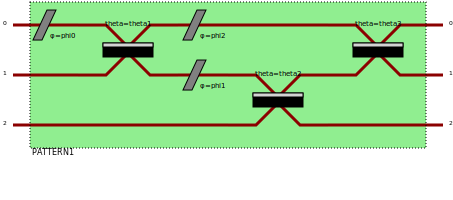

In [2]:
pattern1=pcvl.Circuit(3, name="pattern1")//(0,phys.PS(pcvl.P("phi0")))//(0,phys.BS(theta=pcvl.P("theta1")))//(0,phys.PS(pcvl.P("phi2")))//(1,phys.PS(pcvl.P("phi1")))//(1,phys.BS(theta=pcvl.P("theta2")))//(0,phys.BS(theta=pcvl.P("theta3")))
pattern1._color = "lightgreen"
pcvl.pdisplay(pcvl.Circuit(3).add(0,pattern1,False), recursive=True)

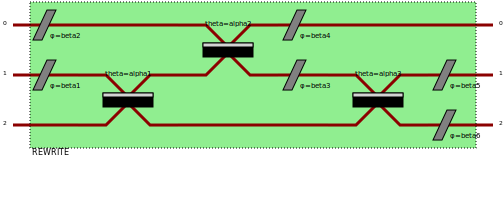

In [3]:
rewrite1=pcvl.Circuit(3, name="rewrite")//(0,phys.PS(pcvl.P("beta2")))//(1,phys.PS(pcvl.P("beta1")))//(1,phys.BS(theta=pcvl.P("alpha1")))//(0,phys.BS(theta=pcvl.P("alpha2")))//(1,phys.PS(pcvl.P("beta3")))//(1,phys.BS(theta=pcvl.P("alpha3")))//(0,phys.PS(pcvl.P("beta4")))//(1,phys.PS(pcvl.P("beta5")))//(2,phys.PS(pcvl.P("beta6")))
rewrite1._color = "lightgreen"
pcvl.pdisplay(pcvl.Circuit(3).add(0,rewrite1,False), recursive=True)

![](../_static/img/rewrite1.png)

In [4]:
pattern2=pcvl.Circuit(1, name="pattern")//phys.PS(pcvl.P("phi1"))//phys.PS(pcvl.P("phi2"))
rewrite2=pcvl.Circuit(1, name="rewrite")//phys.PS(pcvl.P("phi"))

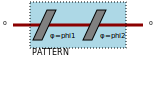

In [5]:
pcvl.pdisplay(pcvl.Circuit(1).add(0,pattern2,False), recursive=True)

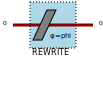

In [6]:
pcvl.pdisplay(pcvl.Circuit(1).add(0,rewrite2,False), recursive=True)

The third rule used in this notebook is the following one:

![](../_static/img/rewrite33.png)

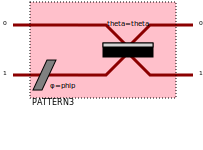

In [7]:
pattern3=pcvl.Circuit(2, name="pattern3")//(1,phys.PS(pcvl.P("phip")))//(0,phys.BS(theta=pcvl.P("theta")))
pattern3._color = "pink"
pcvl.pdisplay(pcvl.Circuit(2).add(0,pattern3,False), recursive=True)

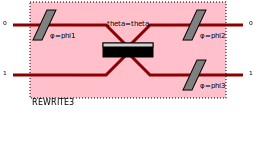

In [8]:
rewrite3=pcvl.Circuit(2, name="rewrite3")//(0,phys.PS(pcvl.P("phi1")))//(0,phys.BS(theta=pcvl.P("theta")))//(0,phys.PS(pcvl.P("phi2")))//(1,phys.PS(pcvl.P("phi3")))
rewrite3._color = "pink"
pcvl.pdisplay(pcvl.Circuit(2).add(0,rewrite3,False), recursive=True)

And the fourth rule is the 38th of the article.

![](../_static/img/rewrite38.png)

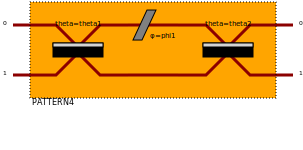

In [9]:
pattern4=pcvl.Circuit(2, name="pattern4")//(0,phys.BS(theta=pcvl.P("theta1")))//(0,phys.PS(pcvl.P("phi1")))//(0,phys.BS(theta=pcvl.P("theta2")))
pattern4._color = "orange"
pcvl.pdisplay(pcvl.Circuit(2).add(0,pattern4,False), recursive=True)

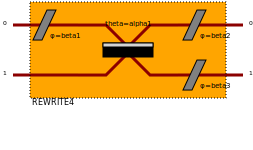

In [10]:
rewrite4=pcvl.Circuit(2, name="rewrite4")//(0,phys.PS(pcvl.P("beta1")))//(0,phys.BS(theta=pcvl.P("alpha1")))//(0,phys.PS(pcvl.P("beta2")))//(1,phys.PS(pcvl.P("beta3")))
rewrite4._color = "orange"
pcvl.pdisplay(pcvl.Circuit(2).add(0,rewrite4,False), recursive=True)

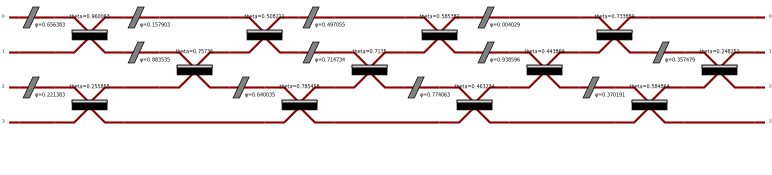

In [11]:
a=pcvl.Circuit.generic_interferometer(4, lambda idx:pcvl.Circuit(2)//phys.PS(phi=random.random())//phys.BS(theta=random.random()), depth=8, shape="rectangle")
pcvl.pdisplay(a, recursive=True, render_size=0.7)

## Normalizing Circuit

In [12]:
import drawSvg as draw
import copy

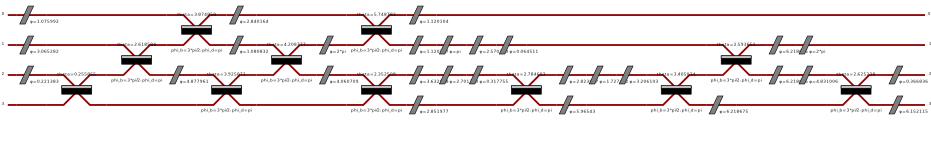

matching pattern pattern1
matching pattern pattern
matching ok {'phi1': 3.632978412940332, 'phi2': 2.7013333138862556}


In [ ]:
reverse = []
direct=[]
def draw_frame(a):
    if isinstance(a, pcvl.Circuit):
        d = pcvl.pdisplay(a, recursive=True, render_size=0.6)
        reverse.insert(0, d)
        direct.append(d)
        return d
    return a

rules = [(pattern1, rewrite1, "lightgreen"), (pattern2, rewrite2, "lightblue"),
         (pattern3, rewrite3, "pink"), (pattern4, rewrite4, "orange")]

with draw.animate_jupyter(draw_frame, delay=0.1) as anim:
    anim.draw_frame(a)
    while True:
        found = False
        for pattern, rewrite, color in rules:
            start_pos = 0
            while True:
                print("matching pattern", pattern._name)
                matched = a.match(pattern, browse=True, pos=start_pos)
                if matched is None:
                    break
                print("matching ok", matched.v_map)
                idx = a.isolate(list(matched.pos_map.keys()), color=color)
                anim.draw_frame(a)
                for k, v in matched.v_map.items():
                    pattern[k].set_value(v)
                v = pattern.compute_unitary(False)
                print("optimizing rewrite",rewrite._name)
                res = optimize(rewrite, v, frobenius, sign=-1)
                print("found params with distance", res.fun)
                subc = rewrite.copy()
                found = True
                a.replace(idx, subc, merge=False)
                anim.draw_frame(a)
                a.replace(idx, subc, merge=True)
                pattern.reset_parameters()
                rewrite.reset_parameters()
                anim.draw_frame(a)
                start_pos = idx
        if not found:
            break

This representation is exaclty the normal form that we wanted to obtain.